In [1]:
#Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [2]:
df['job_work_from_home'].value_counts()

job_work_from_home
False    716189
True      69552
Name: count, dtype: int64

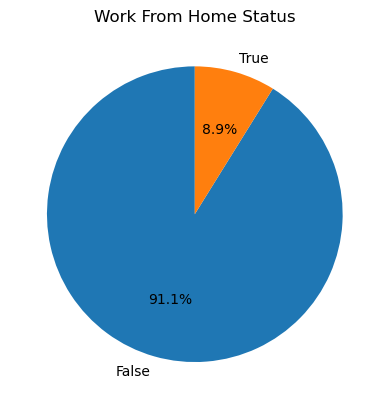

In [4]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('Work From Home Status')
plt.ylabel('')  # Hide the y-label for better aesthetics
plt.show()

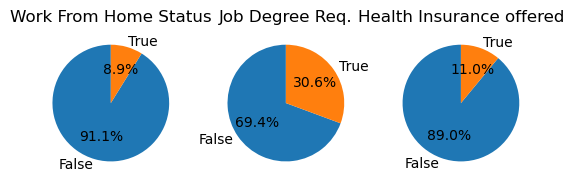

In [12]:
fig, ax = plt.subplots(1,3)

dict_column = {
    'job_work_from_home': 'Work From Home Status',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=df[column].value_counts().index)
    ax[i].set_title(title)


plt.show()